# Wprowadzenie do łańcuchów Markova

https://towardsdatascience.com/introduction-to-markov-chain-programming-8ddbe0ac1c84

In [52]:
import numpy as np
from markovchain_custom import MarkovChain

States: ['sunny', 'rainy']
Transitions: [['SS', 'SR'], ['RS', 'RR']]
T: [[0.9, 0.1], [0.5, 0.5]]


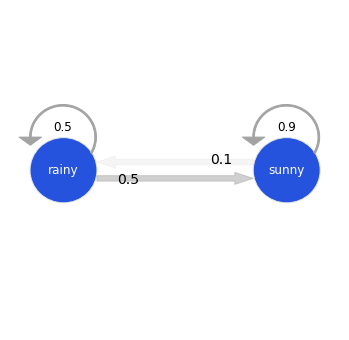

In [53]:
states = ["sunny", "rainy"]
transitions = [["SS", "SR"],["RS", "RR"]]
T = [[0.9, 0.1],[0.5, 0.5]]
print("States: {}\nTransitions: {}\nT: {}".format(states, transitions, T))

MarkovChain(np.array(T), states).draw()

In [44]:
def weather_forecast(n_days, weather_today="sunny"):
    weather_list = [weather_today]
    n = 0
    prob = 1.0    
    while n != n_days:
        if weather_today == "sunny":
            change = np.random.choice(transitions[0], p=T[0])
            if change == "SS":
                prob = prob * T[0][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[0][1]
                weather_list.append(states[1])        
                
        else:
            change = np.random.choice(transitions[1], p=T[1])
            if change == "RS":
                prob = prob * T[1][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[1][1]
                weather_list.append(states[1])        
        n = n + 1        
    return weather_list

In [45]:
weather_forecast(5, "rainy")

['rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy']

# Zadanie – value iteration
 

Zadanie polega na zaimplementowaniu prostego łańcucha decyzyjnego Markowa, w którym mamy 10 możliwych stanów (oznaczanych przez cyfry 0..9), a akcja pojedynczego ruchu polega na wyborze ruchu w prawo lub w lewo.

---   Ruch w prawo: \
o    z prawdopodobieństwem 0.6 przesuwa nas o jedno pole w prawo;   \
o    z prawdopodobieństwem 0.15 przesuwa nas o dwa pola w prawo;    \
o    z prawdopodobieństwem 0.15 przesuwa nas o jedno pole w lewo;   \
o    z prawdopodobieństwem 0.1 przesuwa nas o dwa pola w lewo;

---   Ruch w lewo: \
o    z prawdopodobieństwem 0.6 przesuwa nas o jedno pole w lewo;    \
o    z prawdopodobieństwem 0.15 przesuwa nas o dwa pola w lewo;     \
o    z prawdopodobieństwem 0.15 przesuwa nas o jedno pole w prawo;  \
o    z prawdopodobieństwem 0.1 przesuwa nas o dwa pola w prawo;

Nagrodą za stan 5 (który kończy grę) jest wartość 100. Pozostałe stany mają wartość -2.

**Polecenie** \
Zaimplementuj opisany powyżej łańcuch decyzyjny Markowa, a następnie metodą Value Iteration zaproponuj strategię postępowania w tym łańcuchu.

In [61]:
stan = [_ for _ in range(10)]

P_R = [# 0,    1,    2,    3,    4,    5,    6,    7,    8,    9 stan kolejny/stan początkowy
    [ 0.25,  0.6, 0.15,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0], # 0
    [ 0.25,  0.0,  0.6, 0.15,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0], # 1
    [  0.1, 0.15,  0.0,  0.6, 0.15,  0.0,  0.0,  0.0,  0.0,  0.0], # 2
    [  0.0,  0.1, 0.15,  0.0,  0.6, 0.15,  0.0,  0.0,  0.0,  0.0], # 3
    [  0.0,  0.0,  0.1, 0.15,  0.0,  0.6, 0.15,  0.0,  0.0,  0.0], # 4
    [  0.0,  0.0,  0.0,  0.1, 0.15,  0.0,  0.6, 0.15,  0.0,  0.0], # 5
    [  0.0,  0.0,  0.0,  0.0,  0.1, 0.15,  0.0,  0.6, 0.15,  0.0], # 6
    [  0.0,  0.0,  0.0,  0.0,  0.0,  0.1, 0.15,  0.0,  0.6, 0.15], # 7
    [  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.1, 0.15,  0.0, 0.75], # 8
    [  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.1, 0.15, 0.75]] # 9

P_L = [# 0,    1,    2,    3,    4,    5,    6,    7,    8,    9 stan kolejny/stan początkowy
    [ 0.75, 0.15,  0.1,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0], # 0
    [ 0.75,  0.0, 0.15,  0.1,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0], # 1
    [ 0.15,  0.6,  0.0, 0.15,  0.1,  0.0,  0.0,  0.0,  0.0,  0.0], # 2
    [  0.0, 0.15,  0.6,  0.0, 0.15,  0.1,  0.0,  0.0,  0.0,  0.0], # 3
    [  0.0,  0.0, 0.15,  0.6,  0.0, 0.15,  0.1,  0.0,  0.0,  0.0], # 4
    [  0.0,  0.0,  0.0, 0.15,  0.6,  0.0, 0.15,  0.1,  0.0,  0.0], # 5
    [  0.0,  0.0,  0.0,  0.0, 0.15,  0.6,  0.0, 0.15,  0.1,  0.0], # 6
    [  0.0,  0.0,  0.0,  0.0,  0.0, 0.15,  0.6,  0.0, 0.15,  0.1], # 7
    [  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.15,  0.6,  0.0, 0.25], # 8
    [  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.15,  0.6, 0.25]] # 9

    # Uwaga! Rysunek zaokragla wartosci!

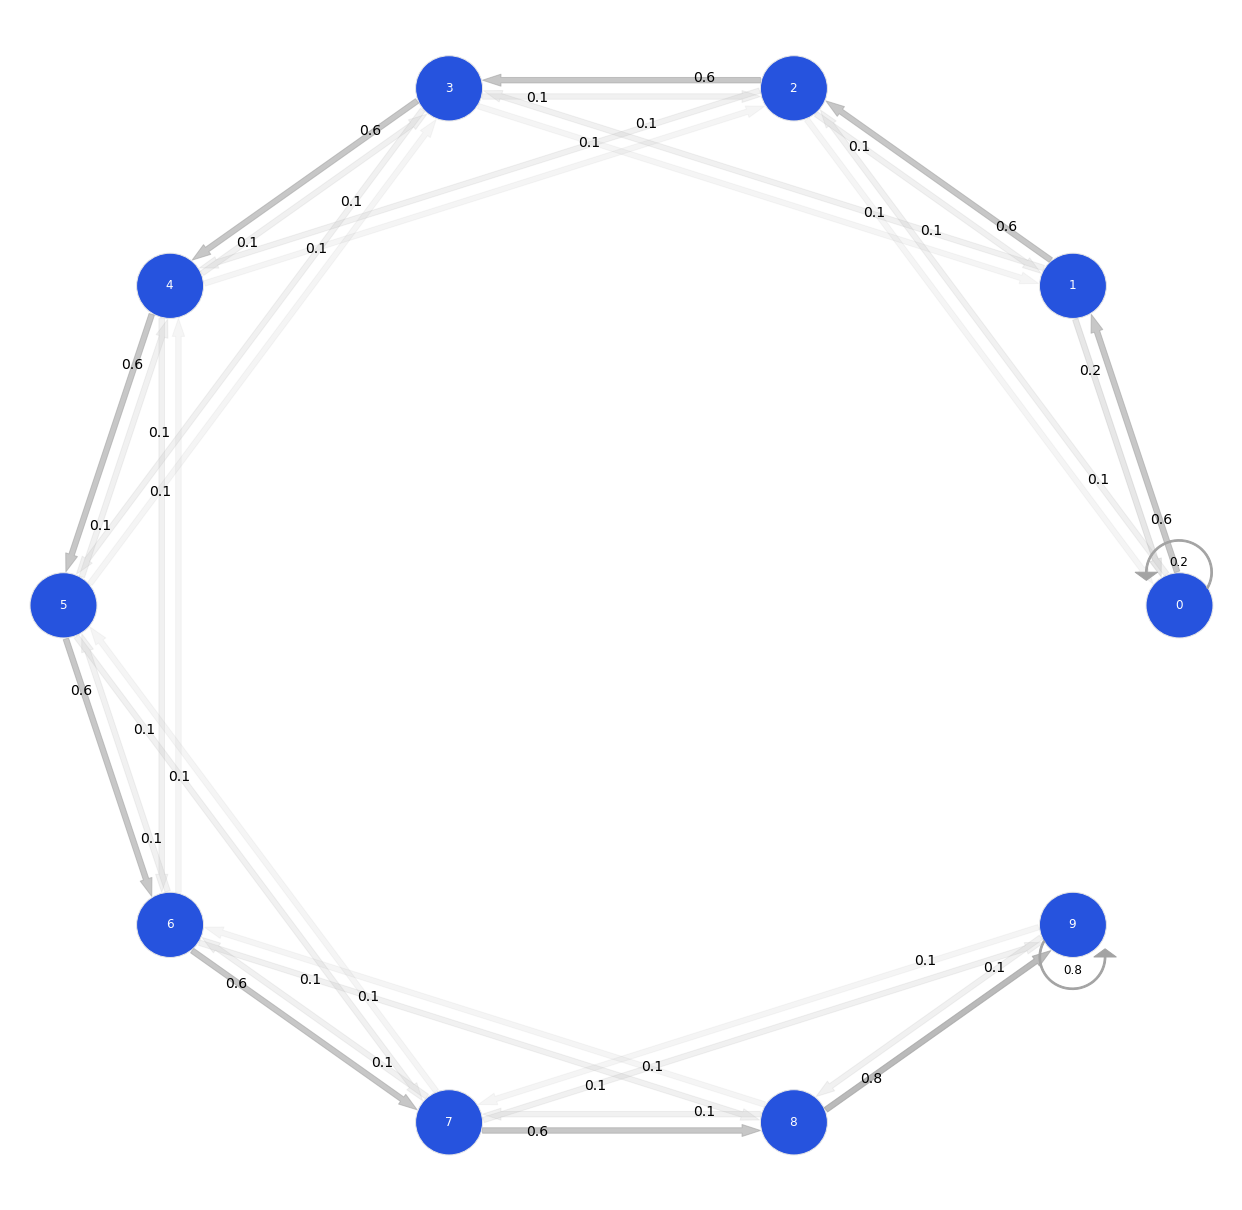

In [62]:
MarkovChain(np.array(P_R), stan).draw()

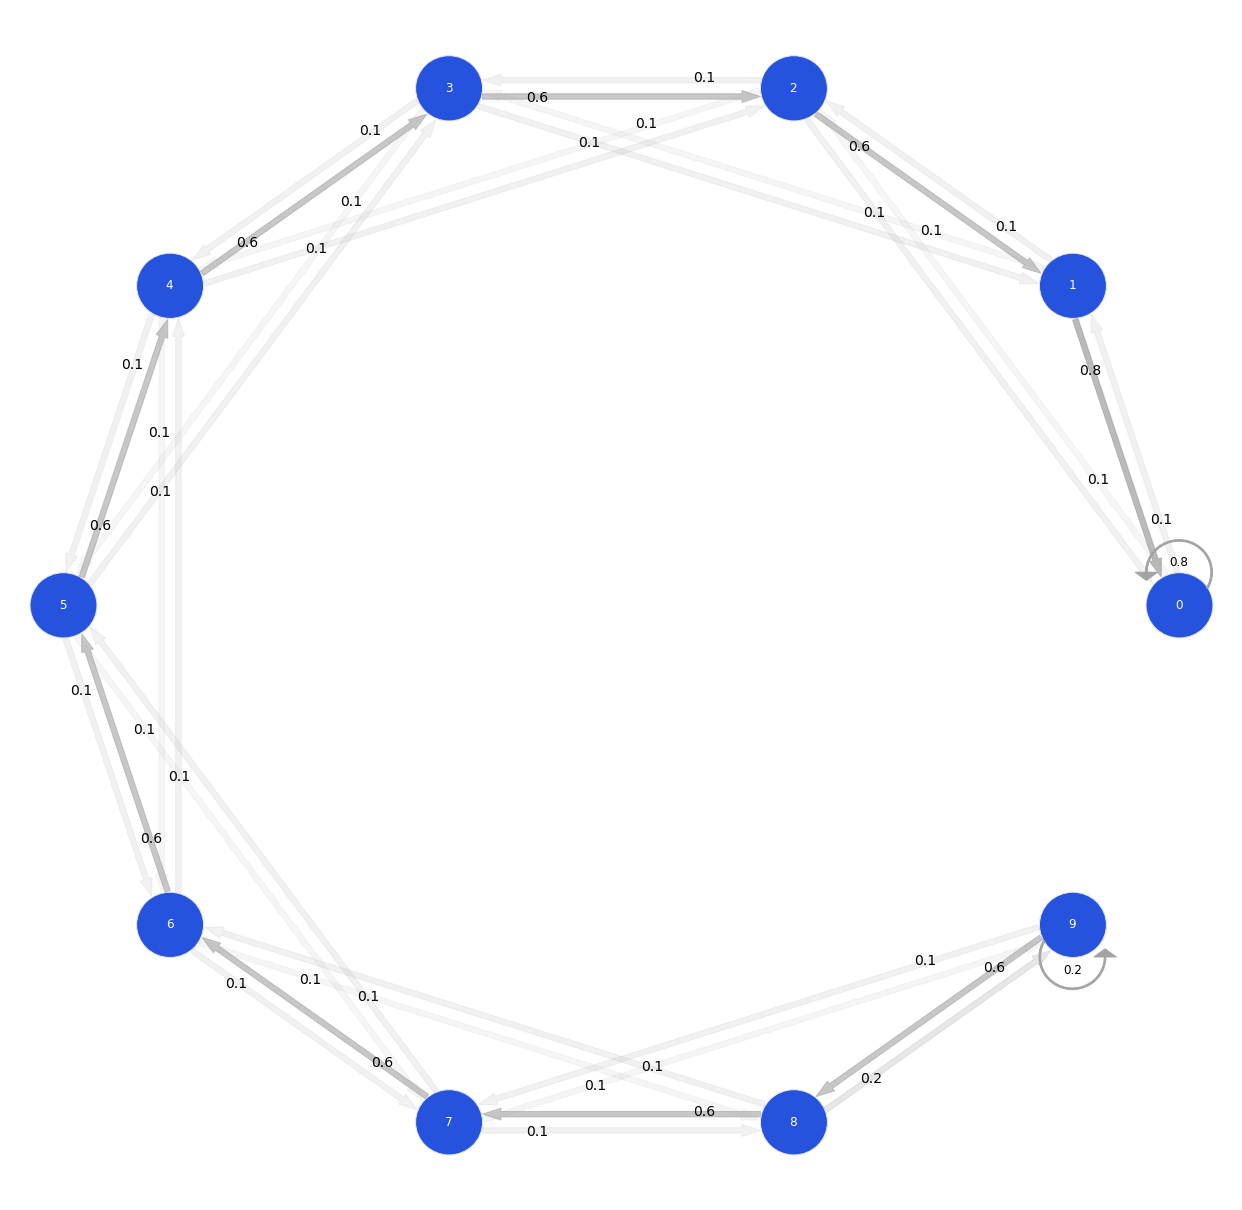

In [63]:
MarkovChain(np.array(P_L), stan).draw()

In [41]:
# Zainicjowanie arbitralnych wartości V
V = [0 for _ in range(len(stan))]
V

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [64]:
# Initialize Markov Decision Process model
actions = (0, 1)  # actions (0=left, 1=right)
states = (0, 1, 2, 3, 4)  # states (tiles)
rewards = [-1, -1, 10, -1, -1]  # Direct rewards per state
gamma = 0.9  # discount factor
# Transition probabilities per state-action pair
probs = [
    [[0.9, 0.1], [0.1, 0.9], [0, 0], [0, 0], [0, 0]],
    [[0.9, 0.1], [0, 0], [0.1, 0.9], [0, 0], [0, 0]],
    [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],  # Terminating state (all probs 0)
    [[0, 0], [0, 0], [0.9, 0.1], [0, 0], [0.1, 0.9]],
    [[0, 0], [0, 0], [0, 0], [0.9, 0.1], [0.1, 0.9]],
]

# Set value iteration parameters
max_iter = 10000  # Maximum number of iterations
delta = 1e-400  # Error tolerance
V = [0, 0, 0, 0, 0]  # Initialize values
pi = [None, None, None, None, None]  # Initialize policy


# Start value iteration
for i in range(max_iter):
    max_diff = 0  # Initialize max difference
    V_new = [0, 0, 0, 0, 0]  # Initialize values
    for s in states:
        max_val = 0
        for a in actions:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Store value best action so far
            max_val = max(max_val, val)

            # Update best policy
            if V[s] < val:
                pi[s] = actions[a]  # Store action with highest value

        V_new[s] = max_val  # Update value with highest value

        # Update maximum difference
        max_diff = max(max_diff, abs(V[s] - V_new[s]))

    # Update value functions
    V = V_new

    # If diff smaller than threshold delta for all states, algorithm terminates
    if max_diff < delta:
        break

In [66]:
pi

[1, 1, 1, 0, 0]